In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emoji

In [2]:
raw_data_csv = pd.read_csv('_chat_2.txt', delimiter = "\t", header = None, names = ['text'])
data = pd.read_csv('_chat_2.txt', delimiter = "\t", header = None, names = ['text'])
data

text
0         [01/06/2014 17:25:05] ‎Vous avez créé ce groupe
1          [01/06/2014 17:25:05] ‎Vous avez été ajouté(e)
2       [02/11/2016 19:38:30] ‪+33 6 99 93 84 26‬: Y a...
3       [02/11/2016 19:38:41] ‪+33 6 99 93 84 26‬: Je ...
4       [02/11/2016 19:40:36] Thibault 👌👍👊😂🐢 Hirsch: S...
...                                                   ...
186608  ‎[28/10/2020 11:58:29] Henri De montalembert: ...
186609  [28/10/2020 11:58:39] Henri De montalembert: T...
186610  [28/10/2020 11:58:51] Henri De montalembert: T...
186611       [28/10/2020 12:00:27] Alexandre Deniau: Fabu
186612  [28/10/2020 12:00:40] Augustin Houette: Commen...

[186613 rows x 1 columns]

In [3]:
import datetime
def verif_date(date):
    try:
        datetime.datetime.strptime(date,'%d/%m/%Y %H:%M:%S')
        return True
    except:
        return False  

In [4]:
# Extract datetime
data[['datetime_str','text_2']] = data["text"].str.replace("[","").str.split("] ", 1, expand=True)
#data["datetime_str"] = data["datetime_str"].apply(lambda x: x.split(" ")[0].strip())
data["datetime_str"] = [_ if verif_date(_) else "aeffacer" for _ in data["datetime_str"]]
data = data[data["datetime_str"]!="aeffacer"]
data["datetime"] = [datetime.datetime.strptime(_,'%d/%m/%Y %H:%M:%S') for _ in data["datetime_str"]]
#data = data.dropna(subset=['datetime'])
data = data.drop(columns = ['datetime_str'])
data
#177075

/Users/henri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


text  \
0         [01/06/2014 17:25:05] ‎Vous avez créé ce groupe   
1          [01/06/2014 17:25:05] ‎Vous avez été ajouté(e)   
2       [02/11/2016 19:38:30] ‪+33 6 99 93 84 26‬: Y a...   
3       [02/11/2016 19:38:41] ‪+33 6 99 93 84 26‬: Je ...   
4       [02/11/2016 19:40:36] Thibault 👌👍👊😂🐢 Hirsch: S...   
...                                                   ...   
186607  [28/10/2020 11:58:07] Alexandre Deniau: T’as d...   
186609  [28/10/2020 11:58:39] Henri De montalembert: T...   
186610  [28/10/2020 11:58:51] Henri De montalembert: T...   
186611       [28/10/2020 12:00:27] Alexandre Deniau: Fabu   
186612  [28/10/2020 12:00:40] Augustin Houette: Commen...   

                                                   text_2            datetime  
0                               ‎Vous avez créé ce groupe 2014-06-01 17:25:05  
1                                ‎Vous avez été ajouté(e) 2014-06-01 17:25:05  
2            ‪+33 6 99 93 84 26‬: Y a du monde qui sort ? 2016-11-02 19:38:30  
3       ‪+33 6 99 93 84 26‬: Je suis potentiellement c... 2016-11-02 19:38:41  
4         Thibault 👌👍👊😂🐢 Hirsch: Sans moi, CC demain ciao 2016-11-02 19:40:36  
...                                                   ...                 ...  
186607  Alexandre Deniau: T’as demandé un rapport ? Ça... 2020-10-28 11:58:07  
186609         Henri De montalembert: T’exportes comme ça 2020-10-28 11:58:39  
186610  Henri De montalembert: T’as un fichier text ap... 2020-10-28 11:58:51  
186611                             Alexandre Deniau: Fabu 2020-10-28 12:00:27  
186612  Augustin Houette: Comment tu sais si t as accè... 2020-10-28 12:00:40  

[177075 rows x 3 columns]

In [5]:
# Extract sender and message
data[['sender','text_message']] = data['text_2'].str.split(': ', 1, expand=True)
data = data.dropna(subset=['text_message'])
data = data.drop(columns = ['text','text_2'])
data

datetime                 sender  \
2      2016-11-02 19:38:30    ‪+33 6 99 93 84 26‬   
3      2016-11-02 19:38:41    ‪+33 6 99 93 84 26‬   
4      2016-11-02 19:40:36  Thibault 👌👍👊😂🐢 Hirsch   
5      2016-11-02 19:40:46  Thibault 👌👍👊😂🐢 Hirsch   
6      2016-11-02 19:40:53    ‪+33 6 99 93 84 26‬   
...                    ...                    ...   
186607 2020-10-28 11:58:07       Alexandre Deniau   
186609 2020-10-28 11:58:39  Henri De montalembert   
186610 2020-10-28 11:58:51  Henri De montalembert   
186611 2020-10-28 12:00:27       Alexandre Deniau   
186612 2020-10-28 12:00:40       Augustin Houette   

                                             text_message  
2                                 Y a du monde qui sort ?  
3       Je suis potentiellement chauffable pour une sc...  
4                                Sans moi, CC demain ciao  
5                              Mais kiffe ton bday la bas  
6                                         Good luck frero  
...                                                   ...  
186607      T’as demandé un rapport ? Ça a changé le menu  
186609                                T’exportes comme ça  
186610  T’as un fichier text après tu en fais ce que t...  
186611                                               Fabu  
186612     Comment tu sais si t as accès au 1er juin 2014  

[176926 rows x 3 columns]

In [6]:
data["sender"] = data["sender"].apply(lambda x: x.replace("\u202a+33\xa06\xa099\xa093\xa084\xa026\u202c","Geoffroy Tasle"))
data["sender"] = data["sender"].apply(lambda x: x.replace("\u202a+33\xa07\xa078\xa014\xa050\xa043\u202c","Gaultier Leplatre$"))
data

datetime                 sender  \
2      2016-11-02 19:38:30         Geoffroy Tasle   
3      2016-11-02 19:38:41         Geoffroy Tasle   
4      2016-11-02 19:40:36  Thibault 👌👍👊😂🐢 Hirsch   
5      2016-11-02 19:40:46  Thibault 👌👍👊😂🐢 Hirsch   
6      2016-11-02 19:40:53         Geoffroy Tasle   
...                    ...                    ...   
186607 2020-10-28 11:58:07       Alexandre Deniau   
186609 2020-10-28 11:58:39  Henri De montalembert   
186610 2020-10-28 11:58:51  Henri De montalembert   
186611 2020-10-28 12:00:27       Alexandre Deniau   
186612 2020-10-28 12:00:40       Augustin Houette   

                                             text_message  
2                                 Y a du monde qui sort ?  
3       Je suis potentiellement chauffable pour une sc...  
4                                Sans moi, CC demain ciao  
5                              Mais kiffe ton bday la bas  
6                                         Good luck frero  
...                                                   ...  
186607      T’as demandé un rapport ? Ça a changé le menu  
186609                                T’exportes comme ça  
186610  T’as un fichier text après tu en fais ce que t...  
186611                                               Fabu  
186612     Comment tu sais si t as accès au 1er juin 2014  

[176926 rows x 3 columns]

In [7]:
data =data[data["sender"]  != '\u202a+33\xa06\xa095\xa061\xa096\xa091\u202c']
data =data[data["sender"]  != '\u202a+33\xa07\xa055\xa046\xa029\xa028\u202c']
data =data[data["sender"]  != '\u202a+95\xa09\xa0771\xa0483531\u202c']
data =data[data["sender"]  != '\u202a+52\xa0221\xa0112\xa08152\u202c']
data =data[data["sender"]  != '\u202a+41\xa076\xa0823\xa082\xa006\u202c']
data =data[data["sender"]  != '\u202a+95\xa09\xa0682\xa0672886\u202c']
data =data[data["sender"]  != '\u202a+261\xa032\xa099\xa0348\xa072\u202c']
data

datetime                 sender  \
2      2016-11-02 19:38:30         Geoffroy Tasle   
3      2016-11-02 19:38:41         Geoffroy Tasle   
4      2016-11-02 19:40:36  Thibault 👌👍👊😂🐢 Hirsch   
5      2016-11-02 19:40:46  Thibault 👌👍👊😂🐢 Hirsch   
6      2016-11-02 19:40:53         Geoffroy Tasle   
...                    ...                    ...   
186607 2020-10-28 11:58:07       Alexandre Deniau   
186609 2020-10-28 11:58:39  Henri De montalembert   
186610 2020-10-28 11:58:51  Henri De montalembert   
186611 2020-10-28 12:00:27       Alexandre Deniau   
186612 2020-10-28 12:00:40       Augustin Houette   

                                             text_message  
2                                 Y a du monde qui sort ?  
3       Je suis potentiellement chauffable pour une sc...  
4                                Sans moi, CC demain ciao  
5                              Mais kiffe ton bday la bas  
6                                         Good luck frero  
...                                                   ...  
186607      T’as demandé un rapport ? Ça a changé le menu  
186609                                T’exportes comme ça  
186610  T’as un fichier text après tu en fais ce que t...  
186611                                               Fabu  
186612     Comment tu sais si t as accès au 1er juin 2014  

[170812 rows x 3 columns]

In [8]:
pd.value_counts(data["sender"])

Thibault 👌👍👊😂🐢 Hirsch    22307
Alexandre Deniau         18059
Geoffroy Tasle           16751
Augustin Houette         14603
Paul Perrin              14315
Aymriche Gt              12831
Thibault Patrat          12124
Xavier De vogue          10489
Robert Darcy              8069
Henri De montalembert     7637
Axel Aubrun               6797
Bertrand Dejean           5700
Augustin Vieillard        5415
Nicolas Chayenko          4439
Gaultier Leplatre         4394
Gaultier Leplatre$        3349
Pablo Veyrat              2730
Eloy De Béru ❤️❤️🍾😘        719
Alexis De senneville        83
TeamReConf                   1
Name: sender, dtype: int64

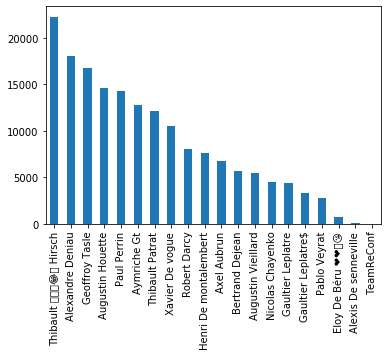

In [10]:
pd.value_counts(data["sender"]).plot(kind="bar")

In [204]:
data.dtypes

datetime        datetime64[ns]
sender                  object
text_message            object
dtype: object

In [205]:
data.tail(20)

datetime                 sender  \
186592 2020-10-28 11:55:28       Alexandre Deniau   
186593 2020-10-28 11:55:32  Henri De montalembert   
186594 2020-10-28 11:55:36       Alexandre Deniau   
186595 2020-10-28 11:55:37        Xavier De vogue   
186596 2020-10-28 11:55:39            Axel Aubrun   
186597 2020-10-28 11:56:30       Augustin Houette   
186598 2020-10-28 11:56:42       Augustin Houette   
186599 2020-10-28 11:56:49       Augustin Houette   
186600 2020-10-28 11:57:03            Axel Aubrun   
186601 2020-10-28 11:57:04       Augustin Houette   
186602 2020-10-28 11:57:13            Paul Perrin   
186603 2020-10-28 11:57:34       Augustin Houette   
186604 2020-10-28 11:57:45            Paul Perrin   
186605 2020-10-28 11:57:46  Henri De montalembert   
186606 2020-10-28 11:57:55       Augustin Houette   
186607 2020-10-28 11:58:07       Alexandre Deniau   
186609 2020-10-28 11:58:39  Henri De montalembert   
186610 2020-10-28 11:58:51  Henri De montalembert   
186611 2020-10-28 12:00:27       Alexandre Deniau   
186612 2020-10-28 12:00:40       Augustin Houette   

                                             text_message  
186592  Jpense les 176 caractères c’est quand il a cop...  
186593  D’ailleurs si quelqu’un a depuis 2014 je suis ...  
186594      Seul bail où il s’inscrit ça a été annulasqué  
186595                          Hahahaha hahahaha écroule  
186596                                   Ce serait ouf ça  
186597                        Comment tu fais pour savoir  
186598            La visco c’est qu’on a changé de groupe  
186599                             Y a eu trineq et teamp  
186600                Tu peux additionner trin et team p?  
186601               Et j’ai du magouillé pour tej Alexis  
186602                                            Ola pdc  
186603                               Jmaitrise pas le pdc  
186604                                      prise de conf  
186605                                  Ouais tu peux aha  
186606                                  Mmmh 7002 du coup  
186607      T’as demandé un rapport ? Ça a changé le menu  
186609                                T’exportes comme ça  
186610  T’as un fichier text après tu en fais ce que t...  
186611                                               Fabu  
186612     Comment tu sais si t as accès au 1er juin 2014

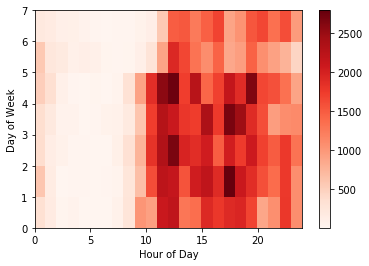

In [11]:
remplacement = {
    'jour_semaine':{
        0:"Dimanche",
        1:"Lundi",
        2:"Mardi",
        3:"Mercredi",
        4:"Jeudi",
        5:"Vendredi",
        6:"Samedi"
    }
}
data['jour_semaine'] = data['datetime'].dt.dayofweek + 1
data['heure'] = data['datetime'].dt.hour
#data.replace(remplacement,inplace=True)
# Create new Dataframe containing data counts
heatmap_data = data.groupby(['jour_semaine', 'heure']).size()
heatmap_data = heatmap_data.unstack()

# Create heatmap
plt.pcolor(heatmap_data, cmap='Reds')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.colorbar()
plt.show()

In [13]:
from nltk.corpus import stopwords
## Create DataFrame with all words used split by sender
# Filter out 'Media Omitted' messages
data_texts = data[~data['text_message'].str.contains('omitted')]

# Create empty DataFrame to use for the word count
words = pd.DataFrame(columns=['sender','words'])
print("Done")
# Loop through all messages in the DataFrame
wordslist = []
senderlist = []
words = pd.DataFrame(columns=["sender","words"])
for sender, message in zip(data_texts.sender, data_texts.text_message): 
    # Split out each word in each messa
    message_split = message.split()
    for word in message_split:
        # Add each word to the DataFrame
        wordslist.append(word.lower())
        senderlist.append(sender)
        #words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
    #print("done2")
words["sender"] = senderlist
words["words"] = wordslist

print("Done3")
# Remove punctuation from the start and end of words
words['words'] = words['words'].str.replace('(^\W)|(\W$)','')

# Create list of 'non-words' that we don't care about
non_words = stopwords.words('french')
non_words.extend([" ","","a","les","ça","c'est","si","fait","plus","ca","va","j'ai","chez","ils","pr","fais","vais","être","2","cette","faire","non","tout","quoi","aussi","oui"])
non_words = set([i.lower() for i in non_words])
#words_filtered = [word for word in words if word.lower() not in non_words]
# Filter out this list of 'non-words' from each set of words
words_filtered = words[~words['words'].isin(non_words)]
# Create word counts as a series
word_count_total_series = words_filtered.groupby(['words']).size().sort_values(ascending=False)

# Create word counts series as a DataFrame
word_count_total = pd.DataFrame(word_count_total_series)

# Reset index in order to name columns correctly
word_count_total = word_count_total.reset_index()
word_count_total.columns = ['words', 'count']

# Display top 10 words used
word_count_total.head(10)

Done
Done3


words  count
0  c’est   6507
1  chaud   3587
2   j’ai   3433
3   bien   3073
4   trop   2503
5   soir   2276
6    yes   2257
7   full   1982
8    mec   1944
9    bon   1888

In [293]:
word_count_total.head(20)

words  count
0       c’est   6507
1       chaud   3587
2        j’ai   3433
3        bien   3073
4        trop   2503
5        soir   2276
6         yes   2257
7        full   1982
8         mec   1944
9         bon   1888
10      quand   1853
11       peux   1774
12      comme   1757
13  tellement   1740
14       très   1740
15        gus   1724
16        ptn   1625
17       faut   1624
18       gros   1616
19       vrai   1611

In [14]:
word_count_total[word_count_total['words'].isin(['full','chiz','visqueux','fifin','smar','trin','fineq','tules',"hallu","chope","choper","pecho","rebs","ken","weed","dauphine","ax","aym","gus","alex","xav","thib","pat","pab","paul","nico","bobby","bobi","psg","match","visq","m","beut","got","geo","gusv","gush","quali"])]

words  count
7         full   1982
15         gus   1724
24        chiz   1428
38        beut   1201
42        thib   1166
46       hallu   1127
50         xav   1099
67       match    884
75        alex    819
134        geo    532
152       paul    485
158        pab    470
164   visqueux    460
173       nico    440
199        got    399
241         ax    342
334        pat    266
366      fifin    239
384        aym    231
389        psg    229
510       bobi    174
756      bobby    113
778       visq    111
805        ken    106
844   dauphine    101
1284    choper     64
1395     chope     59
1683      smar     47
1703     quali     46
1860      trin     41
1970      rebs     38
2438     pecho     29
2540      gusv     28
3046     fineq     22
3853      weed     16
6432      gush      8
7339     tules      7

In [15]:
# Clear DataFrame to create words used
emojis = pd.DataFrame(columns=['sender','emoji','datetime'])

# Loop through all messages in the DataFrame
for sender, message, datetime in zip(data.sender, data.text_message, data.datetime):
    

  # Split out each word in each message
    message_split = list(message)
 
  # Loop through each word in split message
    for character in message_split:
 
    # If the word is an emoji
        if character in emoji.UNICODE_EMOJI and character != "\U0001f3fc":
 
      # Add each emoji to the DataFrame
            emojis = emojis.append({'sender' : sender, 'emoji' : character, 'datetime' : datetime}, ignore_index=True)

# Display top n most popular emojis
emojis.groupby(['emoji']).size().sort_values(ascending=False).head(10)

emoji
❤    489
😍    365
😂    348
🏻    232
👍    135
🦆    127
🙃    113
👌     84
💪     56
😢     55
dtype: int64

In [251]:

## Simple visualtion
!pip install wordcloud

     |████████████████████████████████| 163kB 5.6MB/s eta 0:00:01


In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stp = stopwords.words('french')
del stp[stp.index('s')]
stp.extend([" ","","a","les","ça","c'est","si","fait","plus","ca","va","j'ai","chez","ils","pr","fais","vais","être","2","cette","faire","non","tout","quoi","aussi","oui","ye","chaud","comme","quand","yes","bon","soir","bien","peux"])
def generate_wordcloud(text,stp): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(#font_path='/Library/Fonts/Verdana.ttf',
                          #relative_scaling = 1.0,
                          stopwords = stp # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [31]:
del stp[stp.index('s')]

In [32]:
stp

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'je',
 'la',
 'le',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'eu',
 'eu

In [18]:
data_texts = data[~data['text_message'].str.contains('omitted')]
#Create empty DataFrame to use for the word count
words = pd.DataFrame(columns=['sender','words'])
print("Done")

#Loop through all messages in the DataFrame
wordslist = []
senderlist = []

words = pd.DataFrame(columns=["sender","words"])
for message in data_texts.text_message: 
    # Split out each word in each messa
    message_split = message.split()
    for word in message_split:
        # Add each word to the DataFrame
        wordslist.append(word.lower())
        #senderlist.append(sender)

        
#non_words = stopwords.words('french')
#non_words.extend([" ","","a","les","ça","c'est","si","fait","plus","ca","va","j'ai","chez","ils","pr","fais","vais","être","2","cette","faire","non","tout","quoi","aussi","oui"])
## Filter out this list of 'non-words' from each set of words
#words_filtered = wordslist[~pd.DataFrame(wordslist).isin(non_words)]
mesmots = " ".join(wordslist)

Done


In [23]:
wordslist

['y',
 'a',
 'du',
 'monde',
 'qui',
 'sort',
 '?',
 'je',
 'suis',
 'potentiellement',
 'chauffable',
 'pour',
 'une',
 'school',
 'sans',
 'moi,',
 'cc',
 'demain',
 'ciao',
 'mais',
 'kiffe',
 'ton',
 'bday',
 'la',
 'bas',
 'good',
 'luck',
 'frero',
 'contrôle',
 'continu',
 'cim',
 'veut',
 'good',
 'luck',
 'mano',
 'personne',
 'chaud',
 'pour',
 'un',
 'drink',
 'jules',
 'moi',
 'bcp',
 'trop',
 'de',
 'taff',
 '\u200eles',
 'messages',
 'et',
 'les',
 'appels',
 'sont',
 'chiffrés',
 'de',
 'bout',
 'en',
 'bout.',
 'aucun',
 'tiers,',
 'pas',
 'même',
 'whatsapp,',
 'ne',
 'peut',
 'les',
 'lire',
 'ou',
 'les',
 'écouter.',
 'xav',
 'balance',
 'le',
 'taff',
 'en',
 'oral',
 'stp',
 'depuis',
 'quand',
 'vous',
 'bossez',
 '??',
 'pas',
 'beaucoup',
 'mais',
 'toujours',
 'au',
 'bon',
 'moment',
 'ahaha',
 'visco',
 'tresq',
 'oue',
 'squeux',
 'tiens',
 'nous',
 'au',
 'jus',
 ',',
 'les',
 'gars',
 'match',
 'du',
 'réal',
 'bordel',
 "c'est",
 'eno',
 "d'envoyer",
 'u

In [22]:
mesmots

'y a du monde qui sort ? je suis potentiellement chauffable pour une school sans moi, cc demain ciao mais kiffe ton bday la bas good luck frero contrôle continu cim veut good luck mano personne chaud pour un drink jules moi bcp trop de taff \u200eles messages et les appels sont chiffrés de bout en bout. aucun tiers, pas même whatsapp, ne peut les lire ou les écouter. xav balance le taff en oral stp depuis quand vous bossez ?? pas beaucoup mais toujours au bon moment ahaha visco tresq oue squeux tiens nous au jus , les gars match du réal bordel c\'est eno d\'envoyer un message pour ça tain 3-3 hallu tiegoooooo hahahah mattez westworld nouvelle meilleur série hello les reufs j\'espère qu\'il y a des petites dispos chez la team p ce we hahahajah éncore ?? ptin jules moi week scout ptin fait chiee ca par contre bonnard ça ax en fait la dernière fois c\'était pas prévu c\'était à cause du stagesq mais là c\'est un bail de longue date qu\'est ce que jules je le suis fait voler mon scoot cett

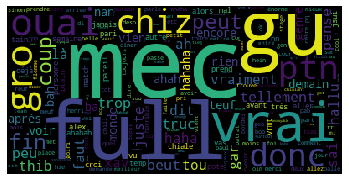

In [34]:
generate_wordcloud(mesmots,stp)

In [298]:
print(words_filtered[words_filtered["words"]!="j'ai"].shape)
print(words_filtered.shape)

(517658, 2)
(517658, 2)


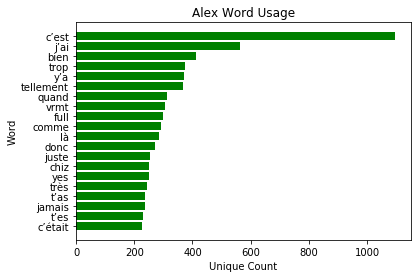

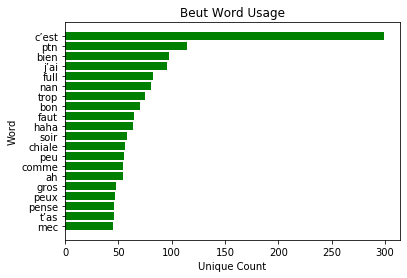

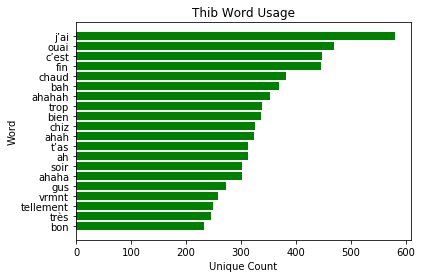

In [20]:
# Create word counts by sender as a series
word_count_by_sender_series = words_filtered.groupby(['sender', 'words']).size().sort_values(ascending=False)

# Create word counts by sender series as a DataFrame
word_count_by_sender = pd.DataFrame(word_count_by_sender_series)

# Reset index in order to name columns correctly
word_count_by_sender = word_count_by_sender.reset_index()
word_count_by_sender.columns = ['sender', 'words', 'count']

# Plot bar chart with top n all words used by me
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Alexandre Deniau'].head(20).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Alex Word Usage")
plt.show()

# Plot bar chart with top n all words used by Alex S
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Bertrand Dejean'].head(20).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Beut Word Usage")
plt.show()

# Plot bar chart with top n all words used by Chris T
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Thibault 👌👍👊😂🐢 Hirsch'].head(20).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Thib Word Usage")
plt.show()

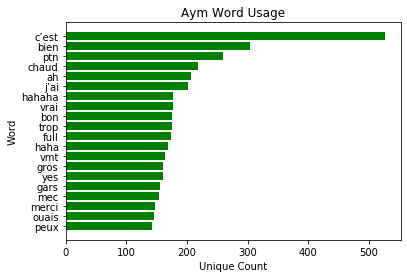

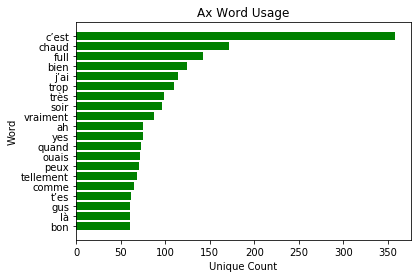

In [38]:
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Aymriche Gt'].head(20).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Aym Word Usage")
plt.show()
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Axel Aubrun'].head(20).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Ax Word Usage")
plt.show()

In [55]:
[_ for _ in index if 'x' not in _]

['Thibault 👌👍👊😂🐢 Hirsch',
 'Geoffroy Tasle',
 'Paul Perrin',
 'Augustin Houette',
 'Aymriche Gt',
 'Thibault Patrat',
 'Xavier De vogue',
 'Robert Darcy',
 'Henri De montalembert',
 'Bertrand Dejean',
 'Augustin Vieillard',
 'Nicolas Chayenko',
 'Gaultier Leplatre',
 '\u202a+33\xa07\xa078\xa014\xa050\xa043\u202c',
 'Pablo Veyrat',
 '\u202a+33\xa06\xa095\xa061\xa096\xa091\u202c',
 '\u202a+33\xa07\xa055\xa046\xa029\xa028\u202c',
 '\u202a+95\xa09\xa0771\xa0483531\u202c',
 '\u202a+52\xa0221\xa0112\xa08152\u202c',
 'Eloy De Béru ❤️❤️🍾😘',
 '\u202a+41\xa076\xa0823\xa082\xa006\u202c',
 '\u202a+95\xa09\xa0682\xa0672886\u202c',
 '\u202a+261\xa032\xa099\xa0348\xa072\u202c',
 'TeamReConf']

KeyError: "None of [Index(['Thibault 👌👍👊😂🐢 Hirsch', 'Geoffroy Tasle', 'Paul Perrin',\n       'Augustin Houette', 'Aymriche Gt', 'Thibault Patrat', 'Xavier De vogue',\n       'Robert Darcy', 'Henri De montalembert', 'Bertrand Dejean',\n       'Augustin Vieillard', 'Nicolas Chayenko', 'Gaultier Leplatre'],\n      dtype='object')] are in the [columns]"